Dataset Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Labels: ['malignant' 'benign']
Shape of X: (569, 30)
Shape of y: (569,)


Training Logistic Regression...
Logistic Regression Accuracy: 0.9766

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97  

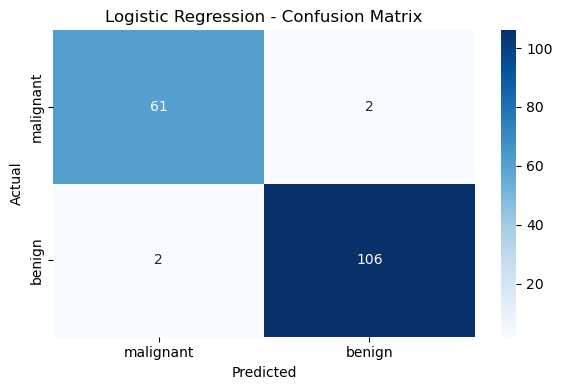


Training Decision Tree...
Decision Tree Accuracy: 0.9532

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.93        63
      benign       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



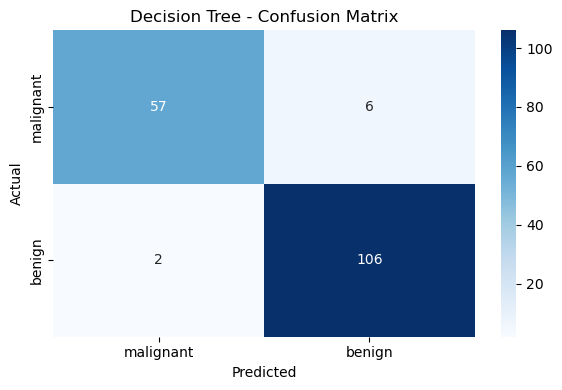


Training SVM...
SVM Accuracy: 0.9357

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.83      0.90        63
      benign       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



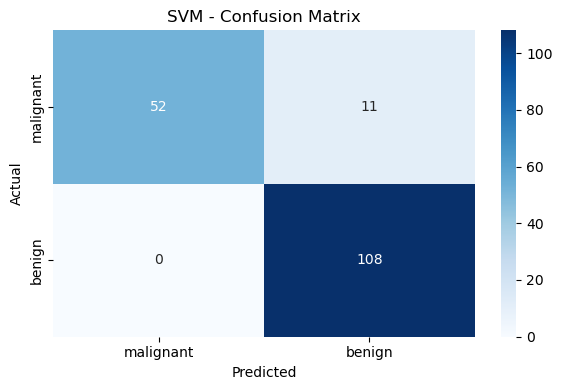


Summary of Accuracy Scores:
Logistic Regression: 0.9766
Decision Tree: 0.9532
SVM: 0.9357


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Print dataset information
print("Dataset Features:", feature_names)
print("Target Labels:", target_names)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}\n")

# Split dataset into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=5),
    'SVM': SVC(kernel='rbf', C=1.0)
}

# Store accuracy scores
accuracy_results = {}

# Train, predict and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Summary of accuracy scores
print("\nSummary of Accuracy Scores:")
for model, score in accuracy_results.items():
    print(f"{model}: {score:.4f}")
